**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


Grupo: G02

Ana Bárbara 
Gabriel Couto
Guilherme Toffoli

1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

In [1]:
!pip3 install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Tamanho da imagem :  (3692, 2812)


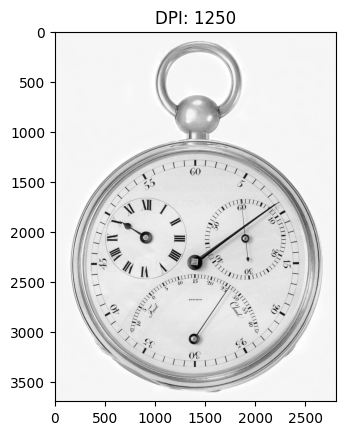

In [9]:
# type your code here
# Python code to read image
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)

plt.title(f"DPI: {1250}")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

print('Tamanho da imagem : ',img.shape)

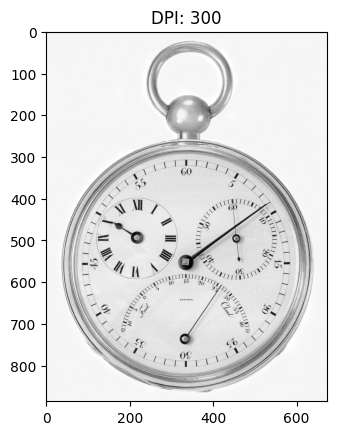

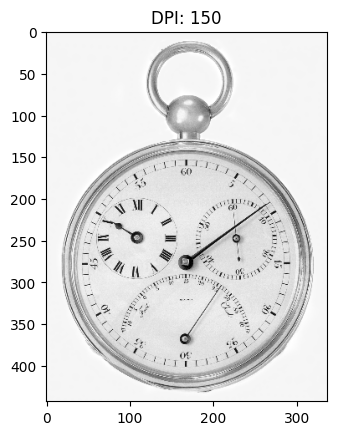

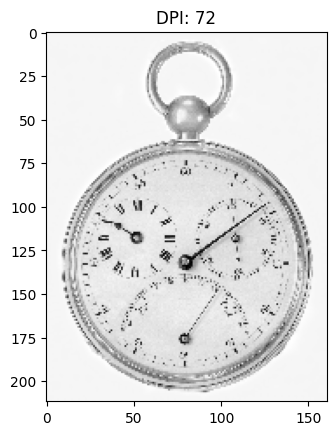

In [11]:
# convertendo para 300, 150 e 72 dpi

linhas = img.shape[0]
colunas = img.shape[1]

def calcular_dpi(novo_dpi, dpi_original=1250, largura_original=img.shape[1], altura_original=img.shape[0]):
    fator        = novo_dpi/ dpi_original
    nova_largura = int(largura_original * fator)
    nova_altura  = int(altura_original  * fator)

    return [nova_largura, nova_altura]

for dpi in [300,150,72]:
    nova_largura, nova_altura = calcular_dpi(dpi)

    plt.imshow(cv2.resize(img, (nova_largura, nova_altura)), cmap="gray")
    plt.title(f"DPI: {dpi}")
    plt.show()

2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

[[ 52  52  52 ...  52  50  52]
 [ 52  52  52 ...  52  50  52]
 [ 52  52  52 ...  52  50  50]
 ...
 [ 79  79  79 ...  97 112 131]
 [ 79  81  79 ... 113 122 132]
 [ 79  81  81 ... 131 129 127]]


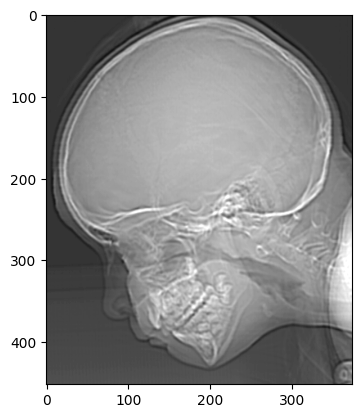

In [18]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

img_np = np.array(img)
print(img_np)

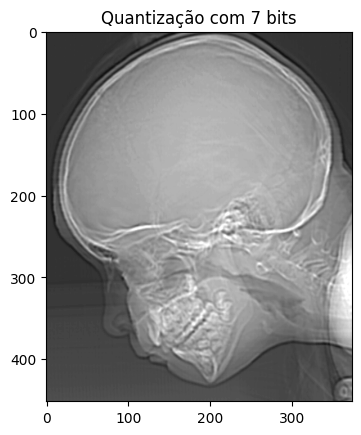

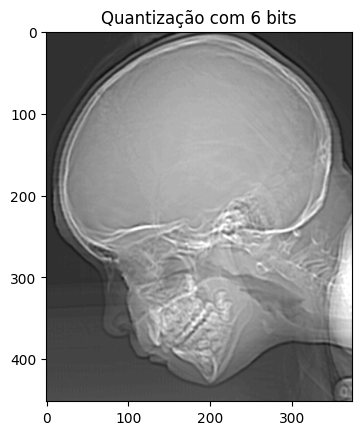

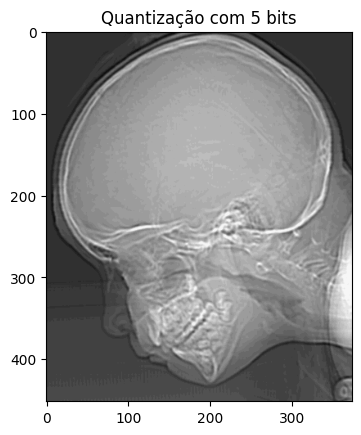

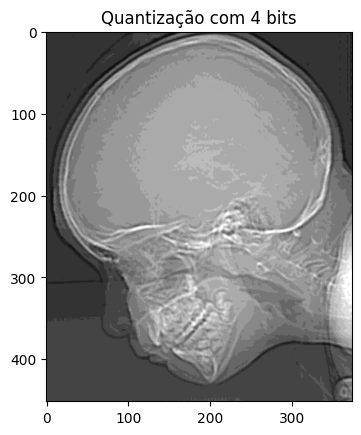

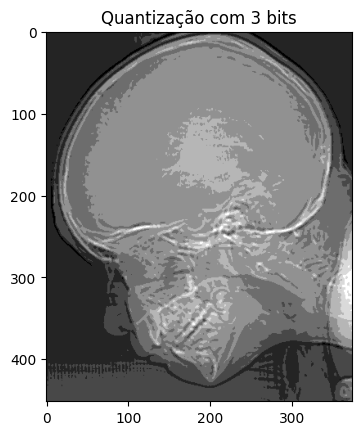

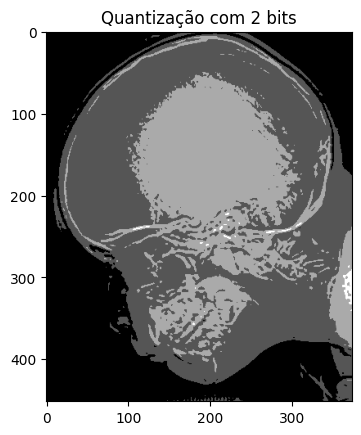

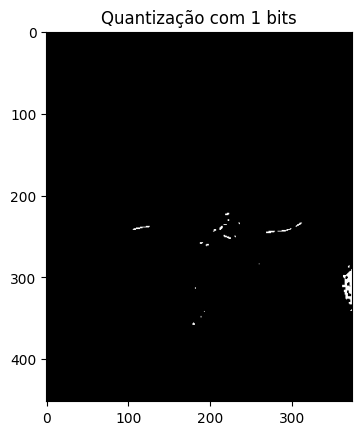

In [27]:
def quantizacao(img, bits):
    niveis = 2 ** bits #quantidade de cinzas
    escala = 255 / (niveis - 1)

    # quantizacao da imagem
    img_quantizada = np.floor(img/ escala) * escala
    img_quantizada = img_quantizada.astype(np.uint8)

    return img_quantizada

for bits in range(7, 0, -1):
    img_quantizada_np = quantizacao(img_np, bits)
    # print(img_quantizada_np)
    plt.imshow(img_quantizada_np, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Quantização com {bits} bits')
    plt.show()

    